<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_3.1


In [1]:
#@title Current Date
Today = '2021-08-02' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "" #@param {type:"string"}
Student_full_name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Example' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

## Fuzzy Systems

The ‘tipping problem’ is commonly used to illustrate the power of fuzzy logic principles to generate complex behavior from a compact, intuitive set of expert rules.

If you’re new to the world of fuzzy systems, you might want to check out this worked example.

### The Tipping Problem

Let’s create a fuzzy control system which models how you might choose to tip at a restaurant. When tipping, you consider the service and food quality, rated between 0 and 10. You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

**Antecedents (Inputs)**
* service
  * Universe (ie, crisp value range): How good was the service of the wait staff, on a scale of 0 to 10?
  * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing

* food quality
  * Universe: How tasty was the food, on a scale of 0 to 10?
  * Fuzzy set: bad, decent, great

**Consequents (Outputs)**
* tip
  * Universe: How much should we tip, on a scale of 0% to 25%
  * Fuzzy set: low, medium, high

**Rules**
* IF the service was good or the food quality was good, THEN the tip will be high.
* IF the service was average, THEN the tip will be medium.
* IF the service was poor and the food quality was poor THEN the tip will be low.

**Usage**
* If I tell this controller that I rated:
  * the service as 9.8, and
  * the quality as 6.5,
* it would recommend I leave:
  * a 20.2% tip.

### Creating the Tipping Controller Using the skfuzzy control API

We can use the skfuzzy control system API to model this. First, let’s define fuzzy variables

In [4]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


     |████████████████████████████████| 993 kB 3.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=96de1e3c0624cad361f046c1fb2a59a8820e283b6f77dffd9289ccf327e2f473
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [5]:
## Antecedent/Consequent objects hold universe variables 

# Antecedent-1
# how good was the service of the wait staff, on a scale of 0 to 10?
service = ctrl.Antecedent(np.arange(0, 10+1, 1), 'service')

# Antecedent-2
# how tasty was the food, on a scale of 0 to 10?
quality = ctrl.Antecedent(np.arange(0, 10+1, 1), 'quality')


## Consequent
# how much should we tip, on a scale of 0% to 25%?
tip = ctrl.Consequent(np.arange(0, 25+1, 1), 'tip')


We can use the fuzzy membership function generators, here you have the link to the module [membership](https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html)

In [6]:
## auto-membership function population is possible with .automf(3, 5, or 7)
# qualtity with 3 membership functions
quality.automf(3)
# service with 3 membership functions
service.automf(3)


In [7]:
# you can build your membership functions with custom parameters
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

To help understand what the membership looks like, use the view methods.

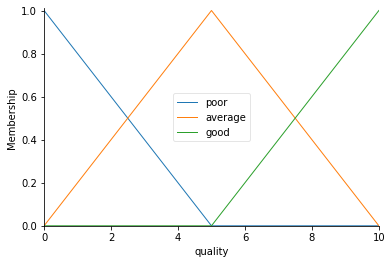

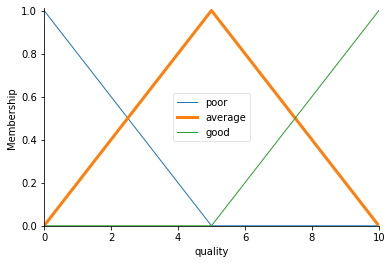

In [8]:
## You can see how these look with .view()

# show 'quality' membership functions 
quality.view()

# show membership functions and highlight one
quality['average'].view()

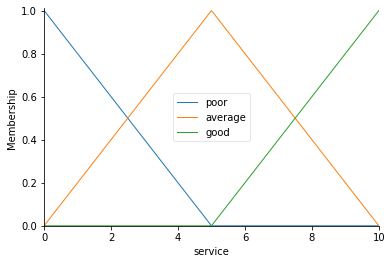

In [9]:
# show 'service' membership functions 
service.view()

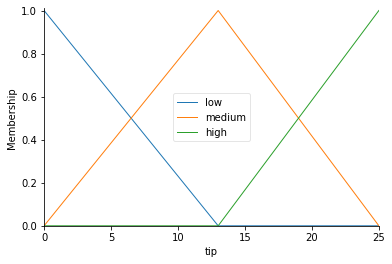

In [10]:
# show 'tip' membership functions
tip.view()

### Fuzzy rules

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

In [11]:
## You could propose your own fuzzy rules

# If the food is poor OR the service is poor, then the tip will be low
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])

# If the service is average, then the tip will be medium
rule2 = ctrl.Rule(service['average'], tip['medium'])

# If the food is good OR the service is good, then the tip will be high.
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39b4486650>)

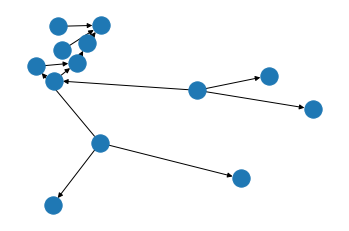

In [12]:
# Rule 1 as a directed graph
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39ac41e3d0>)

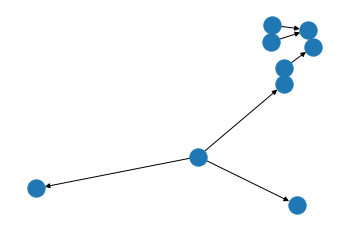

In [13]:
# Rule 2 as a directed graph
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39ac38c390>)

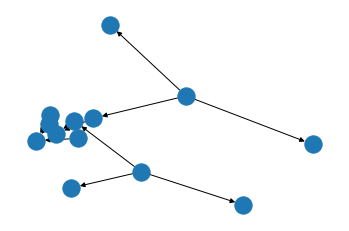

In [14]:
# Rule 3 as a directed graph
rule3.view()

### Control System Creation and Simulation¶

Now that we have our rules defined, we can simply create a control system via:

In [15]:
# Fuzzy system for the tip problem
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In order to simulate this control system, we will create a <code>ControlSystemSimulation</code>. Think of this object representing our controller applied to a specific set of cirucmstances. For tipping, this might be tipping one friend at the local brew-pub. We would create another <code>ControlSystemSimulation</code> when we’re trying to apply our <code>tipping_ctrl</code> for another friend at the cafe because the inputs would be different.

In [16]:
# Calculate results from a ControlSystem
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [17]:
# Pass inputs to the ControlSystem using Antecedent labels
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Compute the fuzzy system
tipping.compute()

Once computed, we can view the result as well as visualize it.

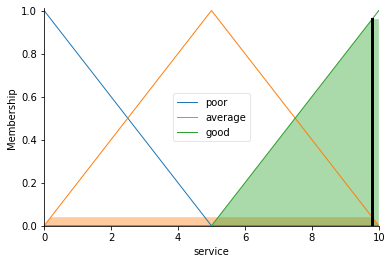

In [18]:
## Antecedent 1
# service input = 9.8
service.view(sim=tipping)

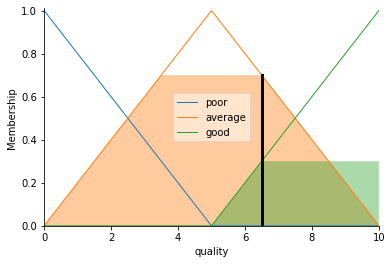

In [19]:
## Antecedent 2
# quality input = 6.5
quality.view(sim=tipping)

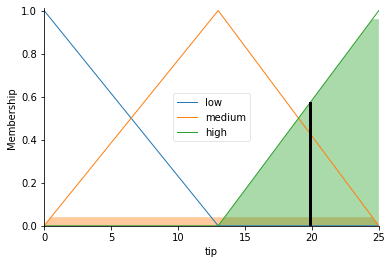

In [20]:
## Consequent
# result view
tip.view(sim=tipping)

In [21]:
# result
print(tipping.output['tip'])

19.847607361963192


The resulting suggested tip is 19.85%.

## Final thoughts

The power of fuzzy systems is allowing complicated, intuitive behavior based on a sparse system of rules with minimal overhead. 

Note our membership function universes were coarse, only defined at the integers, but <code>fuzz.interp_membership</code> allowed the effective resolution to increase on demand. 

This system can respond to arbitrarily small changes in inputs, and the processing burden is minimal.

Python source code: download (generated using skimage 0.2)